[View in Colaboratory](https://colab.research.google.com/github/Joovvhan/ColabTest/blob/master/KerasTransferLearningTest.ipynb)

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /content/gdrive


In [27]:
os.listdir('gdrive/My Drive')

['Colab Notebooks',
 '2018.09.08. 한라 만도 데이터 분석 v1.0.pptx',
 '기계전공석사 논자시 문제(2018-2학기) 송주환.doc',
 '대전에서 할 일.gsheet',
 '8월 9일 SK 미팅.pdf',
 'Paper',
 'Win7_HomePrem_K_SP1_Korean_x64.iso',
 '데이터',
 '유럽 여행 - 주환.zip',
 'PHM Data Challenge 2018.zip',
 '2015_Final.pdf',
 'Continuum Mechanics HW6.pdf',
 'Continuum Mechanics HW5.pdf',
 'PHM Data Challenge 2018 vFinal v2_0.pdf']

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [44]:
model.shape

AttributeError: ignored

In [0]:
img_path = 'gdrive/My Drive/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))

In [56]:
from keras.layers import Input
input_tensor = Input(shape=(224, 224, 3))
model2 = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
new_model2 = Sequential()

new_model2.add(model2)
new_model2.add(Flatten())
new_model2.add(Dense(10, activation='softmax'))

new_model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
from keras.layers import Flatten

In [66]:
new_model2.summary()
new_model2.input

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


<tf.Tensor 'resnet50_input_2:0' shape=(?, 224, 224, 3) dtype=float32>

In [53]:
model2.input

<tf.Tensor 'input_11:0' shape=(?, ?, ?, 3) dtype=float32>

In [55]:
model.input

<tf.Tensor 'input_10:0' shape=(?, 224, 224, 3) dtype=float32>

In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [52]:
model22.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

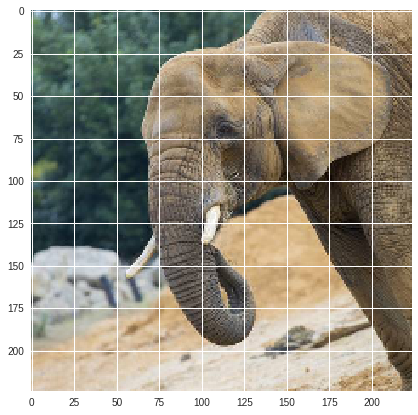

In [30]:
plt.imshow(img)

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [34]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02504458', 'African_elephant', 0.6870666), ('n02504013', 'Indian_elephant', 0.27035475), ('n01871265', 'tusker', 0.04203514)]


Predicted: [('n02123394', 'Persian_cat', 0.5085416), ('n02123597', 'Siamese_cat', 0.35278058), ('n02123045', 'tabby', 0.045271646)]


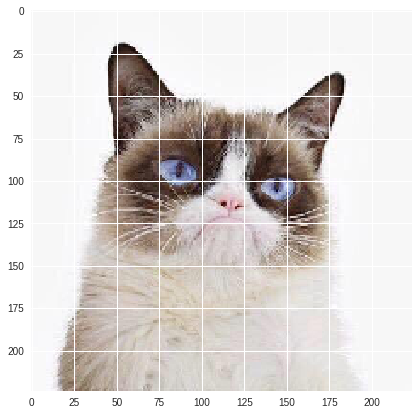

In [36]:
img_path2 = 'gdrive/My Drive/cat.jpg'
img2 = image.load_img(img_path2, target_size=(224, 224))
plt.imshow(img2)
x2 = image.img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)
x2 = preprocess_input(x2)
preds = model.predict(x2)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

In [40]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

features = model.predict(x2)

553467904/553467096 [==============================] - 19s 0us/step


In [41]:
features

array([[2.00159556e-09, 3.72456910e-08, 1.28352937e-07, 4.06078762e-08,
        7.46897442e-08, 1.31360764e-07, 3.40846729e-09, 3.49156863e-08,
        4.50954047e-08, 3.33851502e-09, 7.58369634e-09, 1.83281728e-08,
        4.93553252e-08, 5.64461629e-07, 2.58529664e-09, 4.77630664e-08,
        2.44115472e-05, 3.20725712e-06, 1.18706544e-06, 1.15926476e-07,
        9.24496817e-08, 1.01024966e-07, 1.51530488e-09, 1.90810887e-08,
        1.32032326e-07, 1.38599943e-09, 1.07126863e-09, 7.02066183e-10,
        2.81286683e-09, 2.19593810e-09, 7.65618680e-10, 5.61782010e-10,
        8.70355565e-10, 3.12853576e-10, 2.71883605e-09, 3.08548453e-09,
        5.45157963e-09, 6.96604330e-09, 2.84715873e-09, 2.08167950e-09,
        7.76116948e-09, 1.17145960e-09, 1.27985123e-09, 4.14884616e-09,
        1.20105126e-08, 6.92055258e-09, 3.66792996e-08, 3.88425603e-09,
        8.78033549e-11, 4.11741162e-11, 2.10033949e-10, 2.52119357e-08,
        1.67200184e-07, 1.49197177e-07, 1.18240315e-07, 1.721595

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [0]:
from PIL import Image

In [22]:
import os
os.getcwd()

'/content'

In [0]:
import numpy as np
import scipy.ndimage

In [0]:
scipy.ndimage.zoom(X_train, 8, order = 0).shape

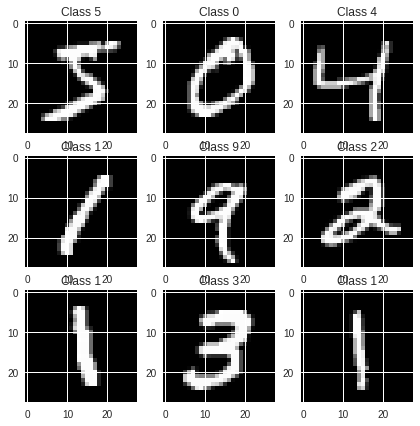

In [16]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [16]:
np.sqrt(784)

28.0

In [17]:
X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 5s 83us/step - loss: 0.0422 - acc: 0.9855 - val_loss: 0.0208 - val_acc: 0.9925
Epoch 2/4
60000/60000 [==============================] - 4s 62us/step - loss: 0.0182 - acc: 0.9939 - val_loss: 0.0135 - val_acc: 0.9953
Epoch 3/4
60000/60000 [==============================] - 4s 62us/step - loss: 0.0132 - acc: 0.9956 - val_loss: 0.0131 - val_acc: 0.9954
Epoch 4/4
60000/60000 [==============================] - 4s 62us/step - loss: 0.0109 - acc: 0.9963 - val_loss: 0.0125 - val_acc: 0.9957


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [12]:
model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 7s 0us/step


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

In [0]:

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'

model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

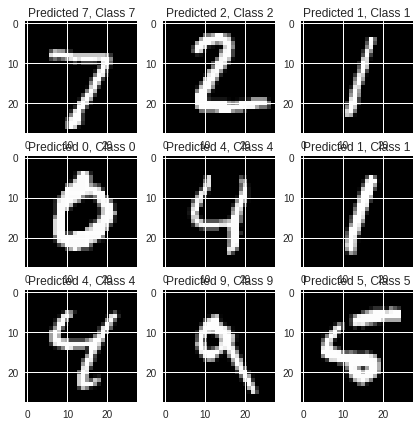

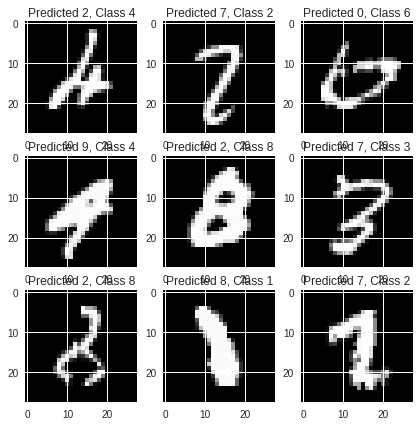

In [28]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

FileNotFoundError: ignored